In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as s
from urllib.request import urlopen as u

In [9]:
url="https://www.flipkart.com/search?q=smart+tv+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&p%5B%5D=facets.fulfilled_by%255B%255D%3DFlipkart%2BAssured&p%5B%5D=facets.smart_tv%255B%255D%3DYes&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3D50000&p%5B%5D=facets.screen_size%255B%255D%3D39%2B-%2B43%2Binch&p%5B%5D=facets.screen_size%255B%255D%3D28%2B-%2B32%2Binch&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.rating%255B%255D%3D4%25E2%2598%2585%2B%2526%2Babove"
html=u(url)
html

In [10]:
pagecode=html.read()

In [11]:
page_file=s(pagecode)

In [12]:
pagetitle=page_file.title
print(pagetitle)

<title>Smart Tv- Buy Products Online at Best Price in India - All Categories | Flipkart.com</title>


In [13]:
#ACCESSING THE PRODUCT NAME 
pname=page_file.find("div",{"class":'_4rR01T'})
pname.text

'SAMSUNG 108 cm (43 inch) Full HD LED Smart TV'

In [14]:
#EXTRACTING WHOLE PAGE PRODUCT NAME
BRAND1_NAME=[]
b=page_file.findAll("div",{"class":'_4rR01T'})
for i in b:
    y=i.text
    BRAND1_NAME.append(y)
BRAND1_NAME

['SAMSUNG 108 cm (43 inch) Full HD LED Smart TV',
 'SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (4K) LED Smart TV',
 'SAMSUNG Crystal 4K Pro 108 cm (43 inch) Ultra HD (4K) LED Smart TV with Voice Search',
 'SAMSUNG 80 cm (32 inch) HD Ready LED Smart TV',
 'SAMSUNG 108 cm (43 inch) Full HD LED Smart TV',
 'SAMSUNG 4 80 cm (32 inch) HD Ready LED Smart TV 2021 Edition',
 'SAMSUNG 4 80 cm (32 inch) HD Ready LED Smart TV',
 'SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Smart TV',
 'SAMSUNG 108 cm (43 inch) Full HD LED Smart TV',
 'SAMSUNG 7 108 cm (43 inch) Ultra HD (4K) LED Smart TV',
 'SAMSUNG 8 108 cm (43 inch) Ultra HD (4K) LED Smart TV',
 'SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Smart TV',
 'SAMSUNG N4200 80 cm (32 inch) HD Ready LED Smart TV',
 'SAMSUNG 108 cm (43 inch) Full HD LED Smart TV',
 'SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Smart TV']

In [15]:
len(BRAND1_NAME) # FINING LENGTH OF THE BRAND NAME

15

In [16]:
del BRAND1_NAME[11:] # TAKING REQUIRED LENGTH
len(BRAND1_NAME)

11

In [17]:
price=page_file.find("div",{"class":'_3I9_wc _27UcVY'})
price.text

'₹38,900'

In [18]:
# TAKING OLD PRICE IN A LIST AND CLEANING THE DATA
OLD_PRICE1=[]
b=page_file.findAll("div",{"class":'_3I9_wc _27UcVY'})
for i in b:
    y=i.text
    OLD_PRICE1.append(int(y[1:].replace(',','')))
print(OLD_PRICE1)
type(OLD_PRICE1[1])
len(OLD_PRICE1)

[38900, 52900, 54900, 22900, 53000, 26490, 26490, 56900, 39900, 49900, 59900, 48900, 24900, 39990, 60900]


15

In [19]:
del OLD_PRICE1[11:]
len(OLD_PRICE1)

11

In [20]:
DISCOUNT=page_file.find("div",{"class":'_3Ay6Sb'})
DISCOUNT.text

'17% off'

In [21]:
# EXTRACTING DISCOUNT 
DISCOUNT1=[]
b=page_file.findAll("div",{"class":'_3Ay6Sb'})
for i in b:
    y=i.text
    DISCOUNT1.append(y)
print(DISCOUNT1)

['17% off', '28% off', '27% off', '9% off', '21% off', '18% off', '16% off', '20% off', '9% off', '16% off', '17% off', '20% off', '9% off', '3% off', '19% off']


In [22]:
del DISCOUNT1[11:]
len(DISCOUNT1)

11

In [23]:
NEW_PRICE=page_file.find("div",{"class":'_30jeq3 _1_WHN1'})
NEW_PRICE.text

'₹31,990'

In [24]:
#EXTRACTING NEW PRICE AND CLEANING THE DATA
NEW_PRICE1=[]
b=page_file.findAll("div",{"class":'_30jeq3 _1_WHN1'})
for i in b:
    y=i.text
    NEW_PRICE1.append(int(y[1:].replace(',','')))
print(NEW_PRICE1)

[31990, 37990, 39990, 20790, 41800, 21690, 22140, 45400, 36249, 41529, 49590, 38999, 22499, 38790, 48990]


In [25]:
del NEW_PRICE1[11:]
len(NEW_PRICE1)

11

In [26]:
#TAKING DISCOUNT PRICE BY SUBTRACTING OLDPRICE AND NEWPRICE 
discount_price=[]
for i in range(len(OLD_PRICE1)):
    price=OLD_PRICE1[i]-NEW_PRICE1[i]
    discount_price.append(price)
discount_price

[6910, 14910, 14910, 2110, 11200, 4800, 4350, 11500, 3651, 8371, 10310]

In [27]:
#CREATING DICTIONARY AND ADDING NECESSARY DETAILS
d1={'BRAND_NAME1':BRAND1_NAME,'OLD_PRICE1':OLD_PRICE1,'DISCOUNT1':DISCOUNT1,'NEW_PRICE1':NEW_PRICE1,'DIS_PRICE':discount_price}

In [28]:
df1=pd.DataFrame(d1)
df1

,BRAND_NAME1,OLD_PRICE1,DISCOUNT1,NEW_PRICE1,DIS_PRICE
0,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,38900,17% off,31990,6910
1,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,52900,28% off,37990,14910
2,SAMSUNG Crystal 4K Pro 108 cm (43 inch) Ultra ...,54900,27% off,39990,14910
3,SAMSUNG 80 cm (32 inch) HD Ready LED Smart TV,22900,9% off,20790,2110
4,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,53000,21% off,41800,11200
5,SAMSUNG 4 80 cm (32 inch) HD Ready LED Smart T...,26490,18% off,21690,4800
6,SAMSUNG 4 80 cm (32 inch) HD Ready LED Smart TV,26490,16% off,22140,4350
7,SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Sma...,56900,20% off,45400,11500
8,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,39900,9% off,36249,3651
9,SAMSUNG 7 108 cm (43 inch) Ultra HD (4K) LED S...,49900,16% off,41529,8371


In [29]:
link="https://www.reliancedigital.in/televisions/c/S101812?searchQuery=:relevance:availability:Exclude%20out%20of%20Stock:price:[18490%20TO%2050000]:brand:Samsung&page=0"
html=u(link)
html

In [30]:
pagecode=html.read()

In [31]:
page_file=s(pagecode)

In [32]:
page_title=page_file.title
print(page_title)

<title data-react-helmet="true">Televisions - Buy LED TV, Smart TV, Android TV Online - Reliance Digital </title>


In [33]:
bname=page_file.find("div",{"class":'slider-text'})
bname.text

'Samsung 80 cm (32 inch) HD Ready LED Smart TV, 4 Series 32T4450₹20,990.00₹25,900.0019%(₹4,910)offers available'

In [34]:
#ACCESSING THE PRODUCT NAME 
brandname=page_file.find("p",{"class":'sp__name'})
brandname.text

'Samsung 80 cm (32 inch) HD Ready LED Smart TV, 4 Series 32T4450'

In [35]:
#EXTRACTING WHOLE PAGE PRODUCT NAME
BRAND_NAME=[]
b=page_file.findAll("div",{"class":'slider-text'})
for i in b:
    p=i.find_all("p")
    for i in p:
        y=i.text
        BRAND_NAME.append(y)
BRAND_NAME

['Samsung 80 cm (32 inch) HD Ready LED Smart TV, 4 Series 32T4450',
 'Samsung 80 cm (32 inch) HD Smart LED TV, Series 4 32T4350AK',
 'Samsung 108 cm (43 inch) Ultra HD (4K) LED Smart TV, 7 Series 43AU7700',
 'Samsung 80 cm (32 inch) HD Ready LED Smart TV, Series 4 32T4600',
 'Samsung 80 cm (32 inch) HD Ready LED Smart TV, Series 4 32T4900',
 'Samsung 108 cm (43 inch) Full HD LED Smart TV, 5 Series 43T5350',
 'Samsung 108 cm (43 inch) Ultra HD (4K) LED Smart TV, 8 Series 43AU8200',
 'Samsung 108 cm (43 inch) Ultra HD (4K) LED Smart TV, 9 Series 43AU9070',
 'Samsung 125 cm (50 inch) Ultra HD (4K) LED Smart TV, 50TU8000',
 'Samsung 80 cm (32 inch) HD Ready LED Smart TV, 4 Series 32T4750',
 'Samsung 108 cm (43 inch) Full HD LED Smart TV, 5 Series 43T5500']

In [36]:
PRICE=page_file.find("div",{"class":'sc-bwzfXH jWpSeo sc-bxivhb hILMWQ'})
PRICE.text

'₹20,990.00₹25,900.0019%(₹4,910)'

In [37]:
#EXTRACTING NEW PRICE AND CLEANING THE DATA
newprice=[]
b=page_file.find_all("div",{"class":'sc-bwzfXH jWpSeo sc-bxivhb hILMWQ'})
for i in b:
    p=i.find_all('span',{"class":'sc-bxivhb dmBTBc'})
    for i in p:
        y=i.text
        newprice.append(int(float(y[1:].replace(',',''))))
print(newprice)

[20990, 20890, 47990, 23990, 26190, 37490, 48490, 48990, 49990, 22490, 38990]


In [38]:
PRICE=page_file.find('em')
PRICE.text

'₹25,900.00'

In [39]:
# TAKING OLD PRICE IN A LIST AND CLEANING THE DATA
x=[]
b=page_file.findAll("div",{"class":'sc-bwzfXH jWpSeo sc-bxivhb hILMWQ'})
for j in b:
    p=j.find_all('span')
    for i in p:
        y=i.text
        x.append(y)
print(x)

['₹20,990.00', '₹', '20,990.00', '₹25,900.00', '₹', '25,900.00', '19%(₹4,910)', '₹20,890.00', '₹', '20,890.00', '₹24,900.00', '₹', '24,900.00', '16%(₹4,010)', '₹47,990.00', '₹', '47,990.00', '₹54,900.00', '₹', '54,900.00', '13%(₹6,910)', '₹23,990.00', '₹', '23,990.00', '₹26,900.00', '₹', '26,900.00', '11%(₹2,910)', '₹26,190.00', '₹', '26,190.00', '₹28,990.00', '₹', '28,990.00', '10%(₹2,800)', '₹37,490.00', '₹', '37,490.00', '₹42,400.00', '₹', '42,400.00', '12%(₹4,910)', '₹48,490.00', '₹', '48,490.00', '₹59,900.00', '₹', '59,900.00', '19%(₹11,410)', '₹48,990.00', '₹', '48,990.00', '₹62,900.00', '₹', '62,900.00', '22%(₹13,910)', '₹49,990.00', '₹', '49,990.00', '₹70,900.00', '₹', '70,900.00', '29%(₹20,910)', '₹22,490.00', '₹', '22,490.00', '₹25,900.00', '₹', '25,900.00', '13%(₹3,410)', '₹38,990.00', '₹', '38,990.00', '₹44,400.00', '₹', '44,400.00', '12%(₹5,410)']


In [40]:
old_price = []
for i in range(3, len(x)+1, 7):
    old_price.append(x[i])
print(old_price)

['₹25,900.00', '₹24,900.00', '₹54,900.00', '₹26,900.00', '₹28,990.00', '₹42,400.00', '₹59,900.00', '₹62,900.00', '₹70,900.00', '₹25,900.00', '₹44,400.00']


In [41]:
oldprice=[]
for i in old_price:
    y=i
    oldprice.append(int(float(y[1:].replace(',',''))))
print(oldprice)
type(oldprice[1])

[25900, 24900, 54900, 26900, 28990, 42400, 59900, 62900, 70900, 25900, 44400]


int

In [42]:
# EXTRACTING DISCOUNT 
D=[]
b=page_file.findAll("div",{"class":'sc-bwzfXH jWpSeo sc-bxivhb hILMWQ'})
for j in b:
    p=j.find_all('span',{"class":'sc-bwzfXH hMTXuH sc-bxivhb dwlVOi'})
    for i in p:
        y=i.text
        D.append(y)
print(D)

['19%(₹4,910)', '16%(₹4,010)', '13%(₹6,910)', '11%(₹2,910)', '10%(₹2,800)', '12%(₹4,910)', '19%(₹11,410)', '22%(₹13,910)', '29%(₹20,910)', '13%(₹3,410)', '12%(₹5,410)']


In [43]:
dis_price=[]
for i in range(len(oldprice)):
    price=oldprice[i]-newprice[i]
    dis_price.append(int(price))
print(dis_price)

[4910, 4010, 6910, 2910, 2800, 4910, 11410, 13910, 20910, 3410, 5410]


In [44]:
d2={'BRAND_NAME2':BRAND_NAME,'OLD_PRICE2':oldprice,'DISCOUNT2':D,'NEW_PRICE2':newprice,'D_PRICE':dis_price}

In [45]:
df2=pd.DataFrame(d2)
df2

,BRAND_NAME2,OLD_PRICE2,DISCOUNT2,NEW_PRICE2,D_PRICE
0,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",25900,"19%(₹4,910)",20990,4910
1,"Samsung 80 cm (32 inch) HD Smart LED TV, Serie...",24900,"16%(₹4,010)",20890,4010
2,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,54900,"13%(₹6,910)",47990,6910
3,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",26900,"11%(₹2,910)",23990,2910
4,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",28990,"10%(₹2,800)",26190,2800
5,"Samsung 108 cm (43 inch) Full HD LED Smart TV,...",42400,"12%(₹4,910)",37490,4910
6,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,59900,"19%(₹11,410)",48490,11410
7,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,62900,"22%(₹13,910)",48990,13910
8,Samsung 125 cm (50 inch) Ultra HD (4K) LED Sma...,70900,"29%(₹20,910)",49990,20910
9,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",25900,"13%(₹3,410)",22490,3410


In [46]:
#DATA TRANSFORMATION
d=df1.join(df2)     #JOINING 1ST AND 2ND WEBSITE DATASET
df=pd.DataFrame(d)
df

,BRAND_NAME1,OLD_PRICE1,DISCOUNT1,NEW_PRICE1,DIS_PRICE,BRAND_NAME2,OLD_PRICE2,DISCOUNT2,NEW_PRICE2,D_PRICE
0,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,38900,17% off,31990,6910,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",25900,"19%(₹4,910)",20990,4910
1,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,52900,28% off,37990,14910,"Samsung 80 cm (32 inch) HD Smart LED TV, Serie...",24900,"16%(₹4,010)",20890,4010
2,SAMSUNG Crystal 4K Pro 108 cm (43 inch) Ultra ...,54900,27% off,39990,14910,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,54900,"13%(₹6,910)",47990,6910
3,SAMSUNG 80 cm (32 inch) HD Ready LED Smart TV,22900,9% off,20790,2110,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",26900,"11%(₹2,910)",23990,2910
4,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,53000,21% off,41800,11200,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",28990,"10%(₹2,800)",26190,2800
5,SAMSUNG 4 80 cm (32 inch) HD Ready LED Smart T...,26490,18% off,21690,4800,"Samsung 108 cm (43 inch) Full HD LED Smart TV,...",42400,"12%(₹4,910)",37490,4910
6,SAMSUNG 4 80 cm (32 inch) HD Ready LED Smart TV,26490,16% off,22140,4350,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,59900,"19%(₹11,410)",48490,11410
7,SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Sma...,56900,20% off,45400,11500,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,62900,"22%(₹13,910)",48990,13910
8,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,39900,9% off,36249,3651,Samsung 125 cm (50 inch) Ultra HD (4K) LED Sma...,70900,"29%(₹20,910)",49990,20910
9,SAMSUNG 7 108 cm (43 inch) Ultra HD (4K) LED S...,49900,16% off,41529,8371,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",25900,"13%(₹3,410)",22490,3410


In [47]:
df.to_excel("PROJtele.xlsx")

In [48]:
tel=pd.read_csv('PROJtele.csv')
tel

,Unnamed: 0,BRAND_NAME1,OLD_PRICE1,DISCOUNT1,NEW_PRICE1,DIS_PRICE,BRAND_NAME2,OLD_PRICE2,DISCOUNT2,NEW_PRICE2,D_PRICE
0,0,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,38900,17% off,31990,6910,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",25900,"19%(?4,910)",20990,4910
1,1,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,52900,28% off,37990,14910,"Samsung 80 cm (32 inch) HD Smart LED TV, Serie...",24900,"16%(?4,010)",20890,4010
2,2,SAMSUNG Crystal 4K Pro 108 cm (43 inch) Ultra ...,54900,27% off,39990,14910,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,54900,"14%(?7,910)",46990,7910
3,3,SAMSUNG 80 cm (32 inch) HD Ready LED Smart TV,22900,9% off,20790,2110,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",26900,"11%(?2,910)",23990,2910
4,4,SAMSUNG 4 80 cm (32 inch) HD Ready LED Smart TV,26490,16% off,22140,4350,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",28990,"10%(?2,800)",26190,2800
5,5,SAMSUNG 4 80 cm (32 inch) HD Ready LED Smart T...,26490,20% off,21150,5340,"Samsung 108 cm (43 inch) Full HD LED Smart TV,...",42400,"12%(?4,910)",37490,4910
6,6,SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Sma...,60900,19% off,48990,11910,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,59900,"19%(?11,410)",48490,11410
7,7,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,53000,21% off,41800,11200,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,62900,"22%(?13,910)",48990,13910
8,8,SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Sma...,56900,20% off,45400,11500,Samsung 125 cm (50 inch) Ultra HD (4K) LED Sma...,70900,"29%(?20,910)",49990,20910
9,9,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,39900,9% off,36249,3651,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",25900,"13%(?3,410)",22490,3410


In [49]:
del tel['Unnamed: 0']

In [50]:
tel.index=np.arange(1,len(tel)+1) #to start index from 1
tel

,BRAND_NAME1,OLD_PRICE1,DISCOUNT1,NEW_PRICE1,DIS_PRICE,BRAND_NAME2,OLD_PRICE2,DISCOUNT2,NEW_PRICE2,D_PRICE
1,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,38900,17% off,31990,6910,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",25900,"19%(?4,910)",20990,4910
2,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,52900,28% off,37990,14910,"Samsung 80 cm (32 inch) HD Smart LED TV, Serie...",24900,"16%(?4,010)",20890,4010
3,SAMSUNG Crystal 4K Pro 108 cm (43 inch) Ultra ...,54900,27% off,39990,14910,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,54900,"14%(?7,910)",46990,7910
4,SAMSUNG 80 cm (32 inch) HD Ready LED Smart TV,22900,9% off,20790,2110,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",26900,"11%(?2,910)",23990,2910
5,SAMSUNG 4 80 cm (32 inch) HD Ready LED Smart TV,26490,16% off,22140,4350,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",28990,"10%(?2,800)",26190,2800
6,SAMSUNG 4 80 cm (32 inch) HD Ready LED Smart T...,26490,20% off,21150,5340,"Samsung 108 cm (43 inch) Full HD LED Smart TV,...",42400,"12%(?4,910)",37490,4910
7,SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Sma...,60900,19% off,48990,11910,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,59900,"19%(?11,410)",48490,11410
8,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,53000,21% off,41800,11200,Samsung 108 cm (43 inch) Ultra HD (4K) LED Sma...,62900,"22%(?13,910)",48990,13910
9,SAMSUNG 108 cm (43 inch) Ultra HD (4K) LED Sma...,56900,20% off,45400,11500,Samsung 125 cm (50 inch) Ultra HD (4K) LED Sma...,70900,"29%(?20,910)",49990,20910
10,SAMSUNG 108 cm (43 inch) Full HD LED Smart TV,39900,9% off,36249,3651,"Samsung 80 cm (32 inch) HD Ready LED Smart TV,...",25900,"13%(?3,410)",22490,3410


<AxesSubplot:>

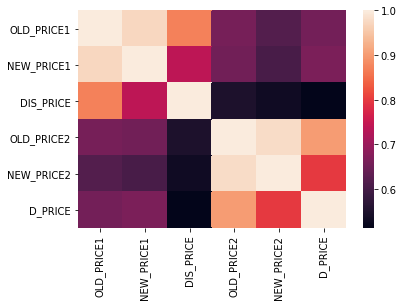

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

x=tel.corr()
sns.heatmap(x) # numerical data's will be shown

In [52]:
# from here inferential statistics 
A=tel.shape[0]
A

11

In [53]:
tel['D_PRICE'].value_counts().sum()

11

In [54]:
B=tel[tel['D_PRICE']==4910].shape[0]
B

2

In [55]:
#PROBABILITY of D_PRICE
prob=(B/A)*100
print(round(prob,2))

18.18


In [56]:
#CONDITIONAL PROBABILITY
cond=(B/A)*((B-1)/(A-1))
cond*100

1.8181818181818183

C:\Users\saadh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


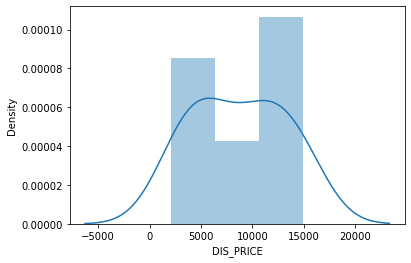

C:\Users\saadh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


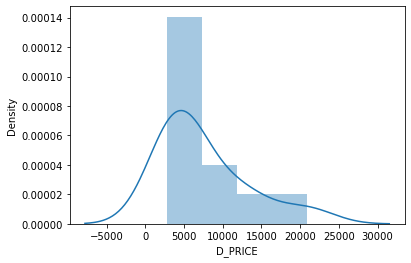

In [57]:
#SKEWNESS OF DISCOUNT PRICE
sns.distplot(tel['DIS_PRICE'])
plt.show()
sns.distplot(tel['D_PRICE'])        
plt.show()

In [75]:
#using sample data to analyse margin error
sample=np.random.choice(a=tel['DIS_PRICE'],size=5)
sample

array([ 4350, 11200,  2110, 14910,  8371], dtype=int64)

In [76]:
k=sample.mean()
k

8188.2

In [77]:
import scipy.stats as st
z=st.norm.ppf(q=0.95)   #Z-score for the sample mean 
z

1.6448536269514722

In [78]:
sd=tel['DIS_PRICE'].std()
sd

4515.981940941427

In [79]:
import math
marginerror=z*(sd/math.sqrt(k))
print("margin error in standard deviation",marginerror) #error analysis

margin error in standard deviation 82.08905050668268


In [80]:
#margin error 
c=(k-marginerror,k+marginerror)
c

(8106.110949493317, 8270.289050506683)

In [81]:
#COMPARISION OF DISCOUNTS ON 2 WEBSITES
tel['DIS_PRICE'].mean() #FLIPKART DISCOUNT

8651.09090909091

In [82]:
tel['D_PRICE'].mean() #RELIANCE DIGITAL DISCOUNT

7500.0

In [ ]:
SO, Flipkart is giving higher dicount than reliance digital

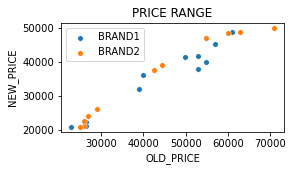

In [67]:
# VISUAISATION OF BIVARIATE 
plt.figure(figsize=(4,2))
sns.scatterplot(x=tel.OLD_PRICE1,y=tel.NEW_PRICE1,s=30)
sns.scatterplot(x=tel.OLD_PRICE2,y=tel.NEW_PRICE2,s=30)
plt.xlabel('OLD_PRICE')
plt.ylabel('NEW_PRICE')
plt.title("PRICE RANGE")
plt.legend(['BRAND1','BRAND2'])

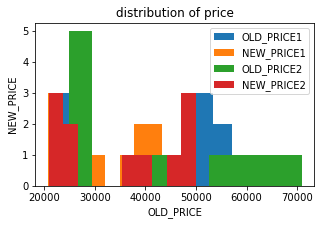

In [68]:
# VISUAISATION OF MULTIVARIATE 
plt.figure(figsize=(5,3))
plt.xlabel('OLD_PRICE')
plt.ylabel('NEW_PRICE')
plt.title("distribution of price")
plt.hist(tel.OLD_PRICE1,bins=10)
plt.hist(tel.NEW_PRICE1,bins=10)
plt.hist(tel.OLD_PRICE2,bins=10)
plt.hist(tel.NEW_PRICE2,bins=10)
plt.legend(['OLD_PRICE1','NEW_PRICE1','OLD_PRICE2','NEW_PRICE2'])